# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
total_mice_count = len(combined_data['Mouse ID'])
print(f"Total number of mice in the dataset: {total_mice_count}")

Total number of mice in the dataset: 1893


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mice_ids = combined_data['Mouse ID'].unique()
unique_mice_count = len(unique_mice_ids)
print(f"Number of unique mice IDs: {unique_mice_count}")



Number of unique mice IDs: 249


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID'])

# Display the first few rows of the cleaned DataFrame
cleaned_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_cleaned_mice_ids = cleaned_data['Mouse ID'].unique()
cleaned_mice_count = len(unique_cleaned_mice_ids)
print(f"Number of mice in the clean DataFrame: {cleaned_mice_count}")


Number of mice in the clean DataFrame: 249


## Summary Statistics

In [8]:
# Group the data by 'Drug Regimen' and calculate the requested statistics
summary_statistics = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

# Round the summary statistics to 2 decimal places for easier read
summary_statistics = summary_statistics.round(2)

# Display the summary statistics table
summary_statistics



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Group by 'Drug Regimen', aggregate, and round the results to two decimal places in a single line for readabilty ease
summary_statistics = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean', Median='median', Variance='var', Std_Deviation='std', SEM='sem'
).round(2)

# Display the summary statistics table
summary_statistics



,Mean,Median,Variance,Std_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

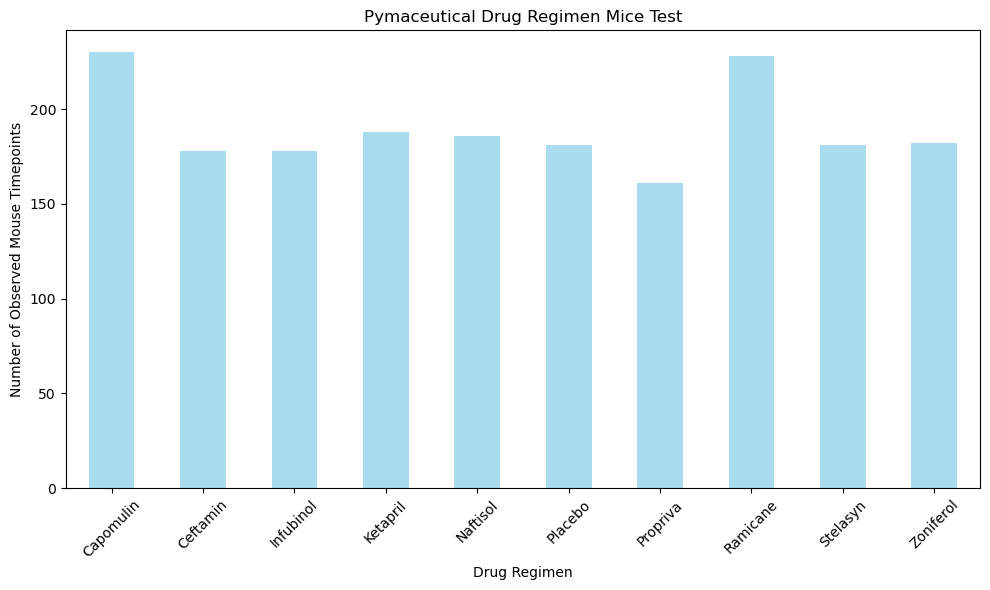

In [13]:
import matplotlib.pyplot as plt

# Group the data by 'Drug Regimen' and count the number of rows in each group
regimen_counts = combined_data.groupby('Drug Regimen')['Mouse ID'].count()

# Create a bar plot
regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=0.7)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Pymaceutical Drug Regimen Mice Test')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



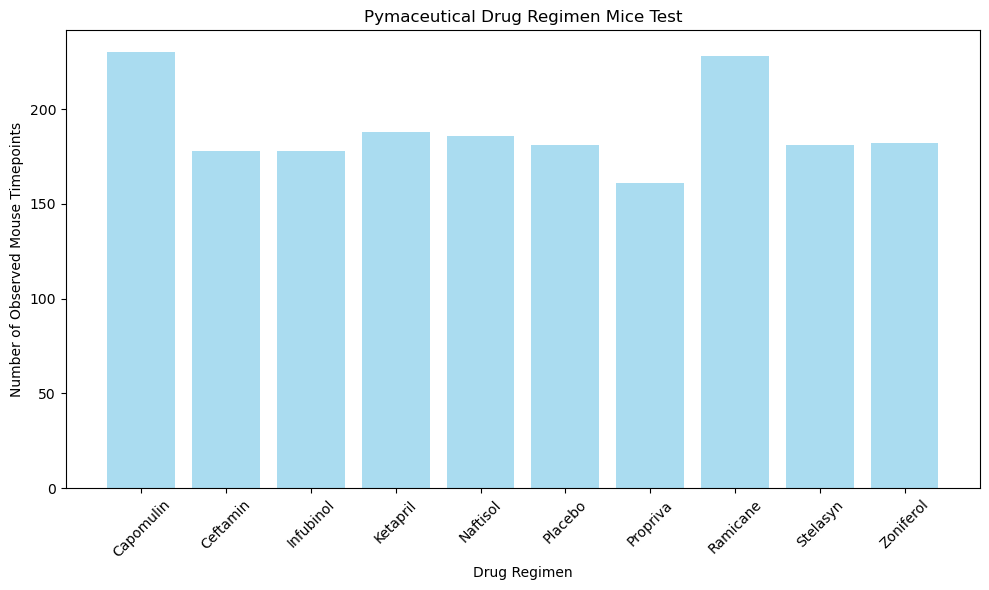

In [14]:
import matplotlib.pyplot as plt

# Group the data by 'Drug Regimen' and count the number of rows in each group
regimen_counts = combined_data.groupby('Drug Regimen')['Mouse ID'].count()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue', alpha=0.7)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Pymaceutical Drug Regimen Mice Test')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



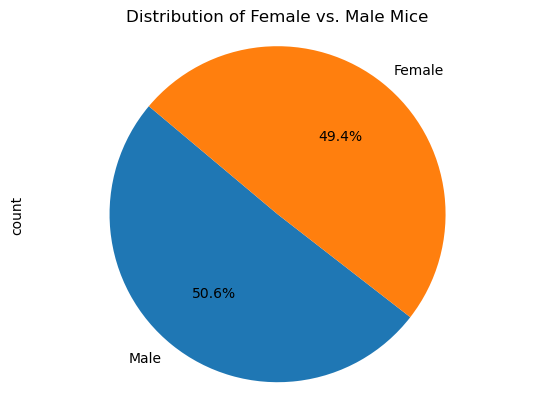

In [15]:
import matplotlib.pyplot as plt

# Group the data by 'Sex' and count the number of mice in each group
gender_distribution = combined_data['Sex'].value_counts()

# Create a pie plot using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



## Quartiles, Outliers and Boxplots

In [16]:
# Create a list of the desired treatment regimens
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data to include only the desired regimens
filtered_data = combined_data[combined_data['Drug Regimen'].isin(target_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, combined_data, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the DataFrame with final tumor volume for each mouse
final_tumor_volume[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]



,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [17]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Display the results
    if outliers.empty:
        print(f"{treatment}'s potential outliers: No outliers found")
    else:
        print(f"{treatment}'s potential outliers:")
        print(outliers)
    print("--------------------")


Capomulin's potential outliers: No outliers found
--------------------
Ramicane's potential outliers: No outliers found
--------------------
Infubinol's potential outliers:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
--------------------
Ceftamin's potential outliers: No outliers found
--------------------


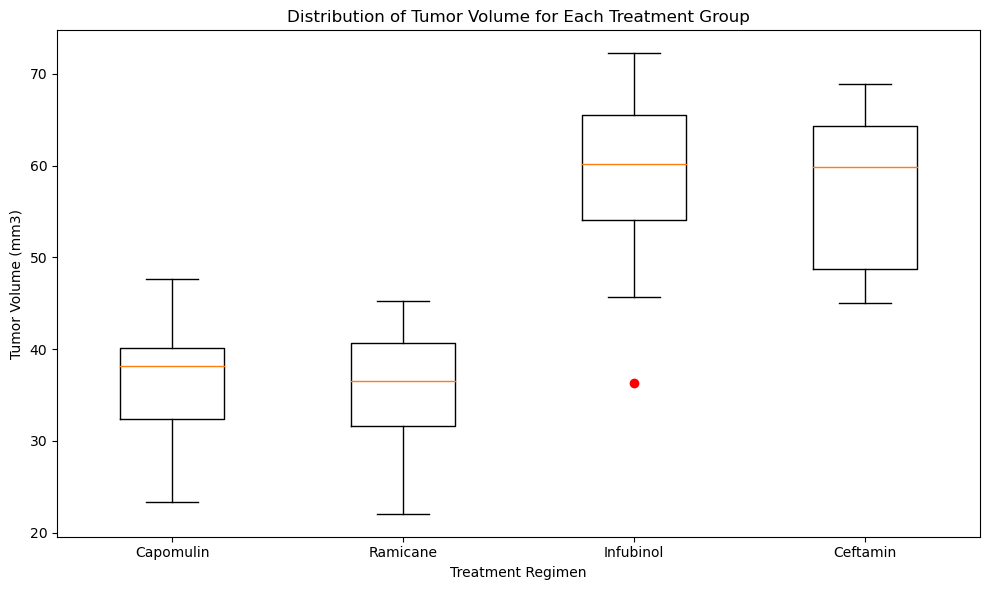

In [18]:
import matplotlib.pyplot as plt

# Create a list of tumor volume data for each treatment group
tumor_vol_data = [tumor_volumes for tumor_volumes in tumor_vol_data]

# Create a list of treatment regimen names
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatment_names, sym='r')  # 'sym' adds red outliers

# Add labels and title
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.xticks(rotation=0) 

# Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## Line and Scatter Plots

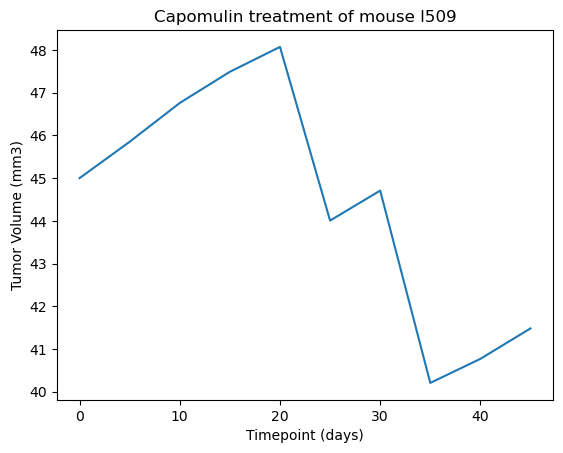

In [16]:
import matplotlib.pyplot as plt

# Filter the data for the specific mouse (I509) treated with Capomulin
mouse_data = combined_data[(combined_data['Drug Regimen'] == 'Capomulin') & (combined_data['Mouse ID'] == 'I509')]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='-', markersize=8)

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse I509')

# Show the plot
plt.grid(True)
plt.show()



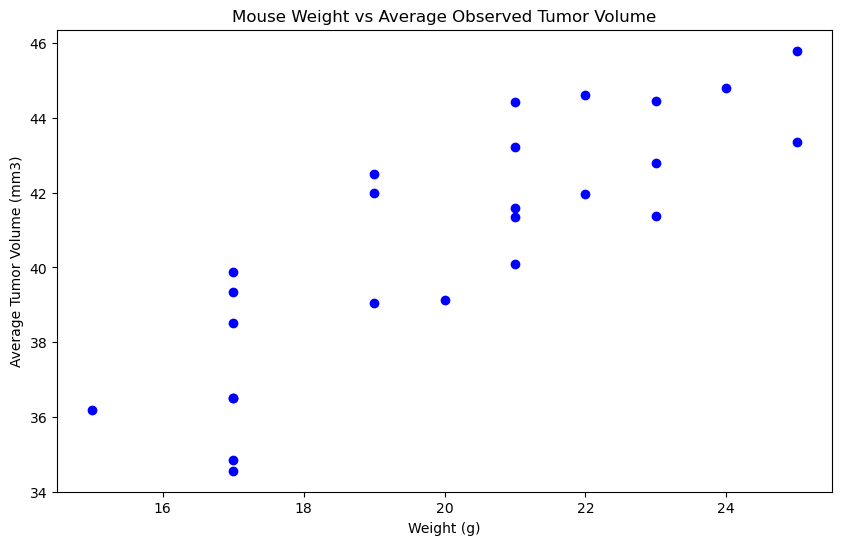

In [21]:
import matplotlib.pyplot as plt

# Filter the data to include only the Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='blue')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Observed Tumor Volume')

# Show the plot
plt.show()


## Correlation and Regression

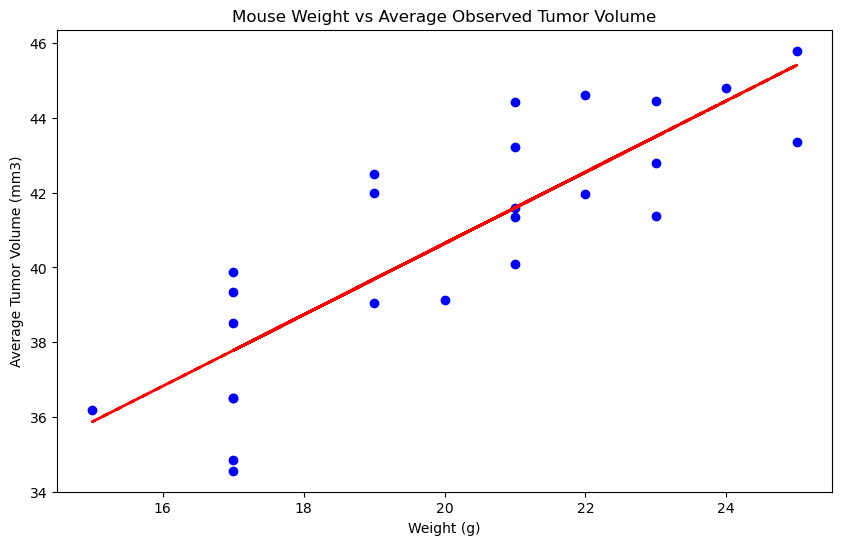

The correlation between mouse weight and the average tumor volume is 0.84


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the data to include only the Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique()

# Convert Pandas Series to NumPy arrays
average_tumor_volume = average_tumor_volume.values
mouse_weights = mouse_weights.apply(lambda x: x[0]).values

# Calculate the correlation coefficient using NumPy
correlation_coefficient = np.corrcoef(mouse_weights, average_tumor_volume)[0, 1]

# Perform linear regression using NumPy
coefficients = np.polyfit(mouse_weights, average_tumor_volume, 1)
slope, intercept = coefficients

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='blue')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Observed Tumor Volume')

# Add linear regression line to the plot
plt.plot(mouse_weights, slope * mouse_weights + intercept, color='red', linestyle='--', linewidth=2)

# Show the plot
plt.show()

# Print the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")